In [1]:
import dense_basis as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.interpolate import interp1d
import os
from spec_id import Gaussian_prior
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from scipy import stats
from time import time
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Initialized stellar population with FSPS.

Couldn't `import tristars`.  Get it from https://github.com/gbrammer/tristars to enable improved blind astrometric matching with triangle asterisms.



In [144]:
db.priors.sample_tx_prior(size =30)

array([[0.38851349, 0.51997494, 0.8076376 ],
       [0.43901961, 0.67912504, 0.84844088],
       [0.46680287, 0.64650213, 0.78399139],
       [0.41108885, 0.65350701, 0.81587757],
       [0.35149747, 0.50037071, 0.75539986],
       [0.44517551, 0.5701916 , 0.72043277],
       [0.33243432, 0.47289649, 0.61859709],
       [0.35609579, 0.47418786, 0.60726343],
       [0.36990841, 0.63303152, 0.75258929],
       [0.33700674, 0.56224286, 0.86829731],
       [0.33230828, 0.4453276 , 0.76041293],
       [0.49185706, 0.56520127, 0.80666318],
       [0.33838889, 0.49714417, 0.63278789],
       [0.3799341 , 0.6515493 , 0.78192099],
       [0.37372553, 0.5300541 , 0.83155398],
       [0.43022433, 0.60468071, 0.77158627],
       [0.44987308, 0.62178421, 0.72460125],
       [0.3361066 , 0.57827486, 0.79764469],
       [0.323111  , 0.41909574, 0.67970876],
       [0.37460633, 0.53702342, 0.78876941],
       [0.44442438, 0.68161371, 0.80840292],
       [0.43482369, 0.69163136, 0.83540725],
       [0.

[  0.         -11.           3.           0.19600359   0.45172339
   0.6411158 ] 1.0


(0, 1)

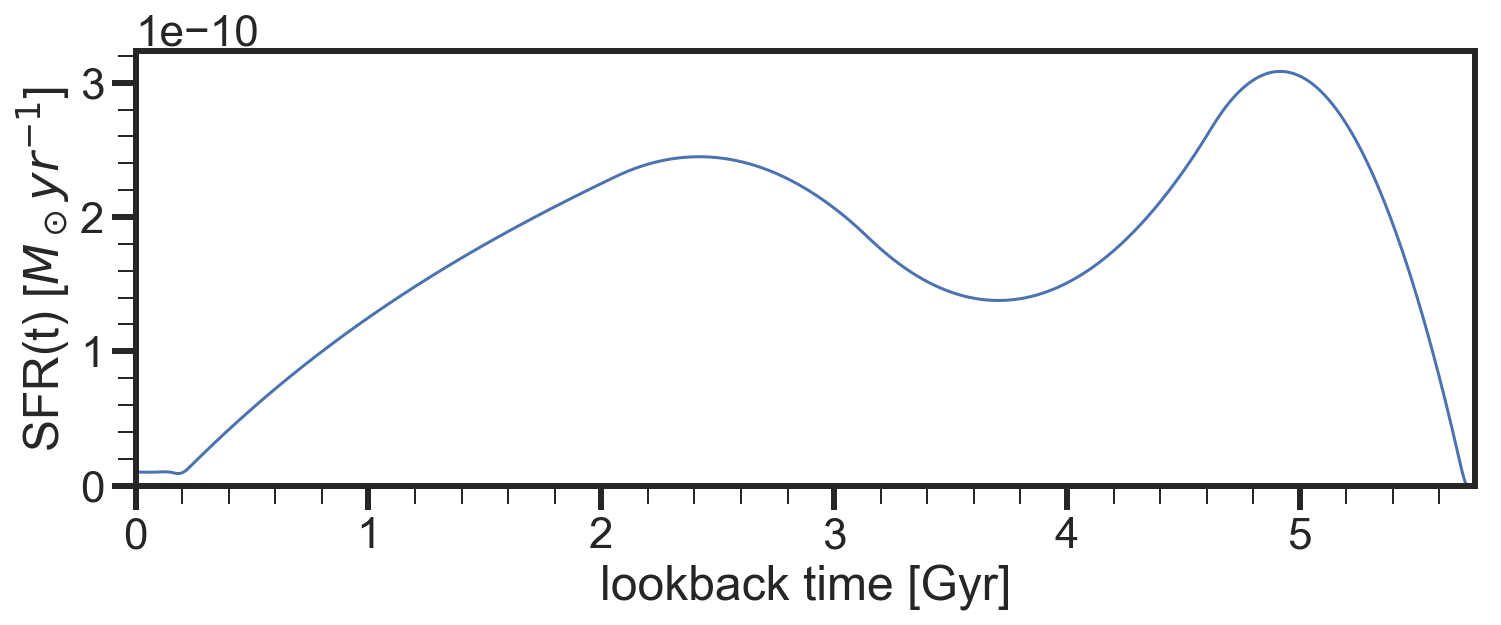

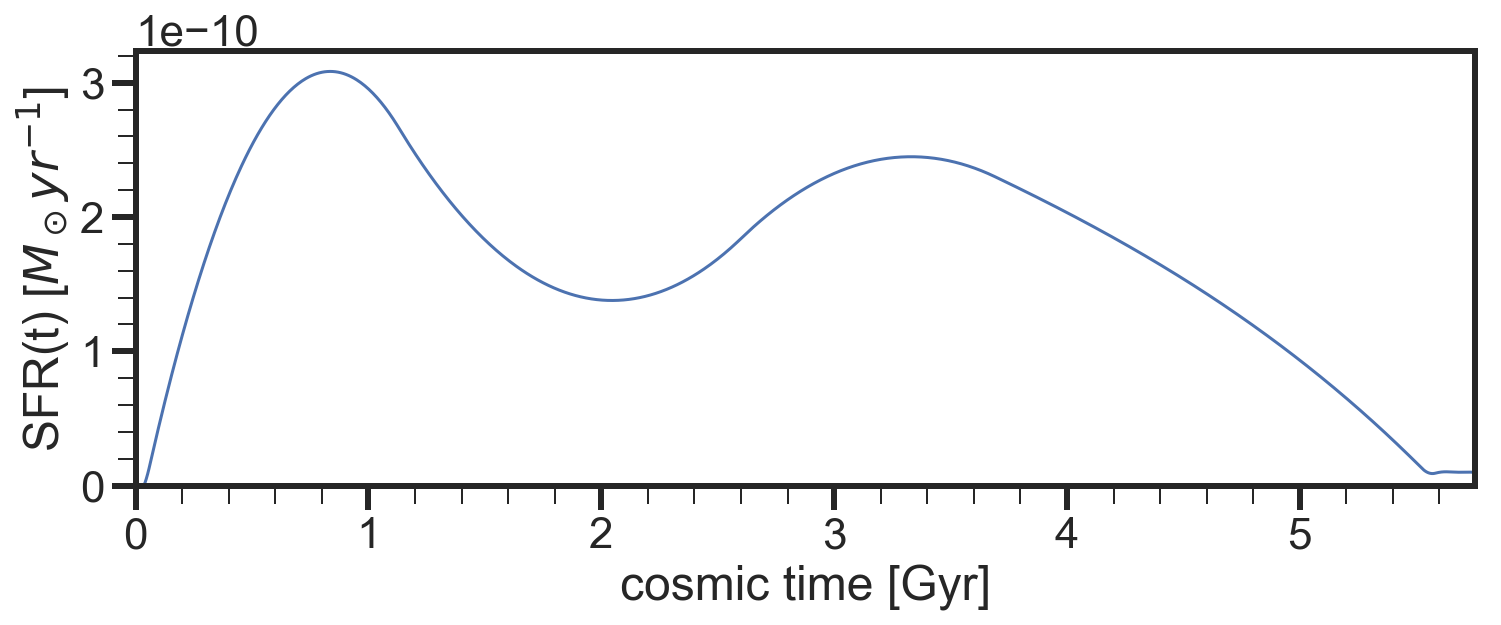

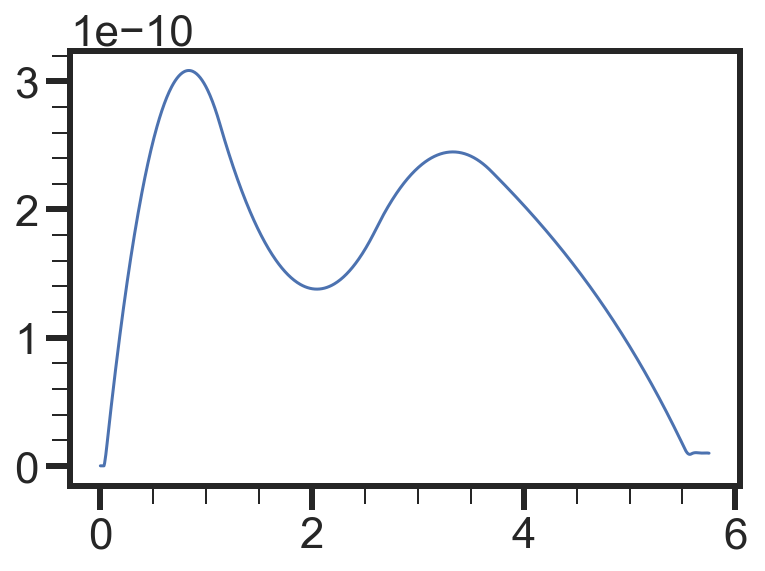

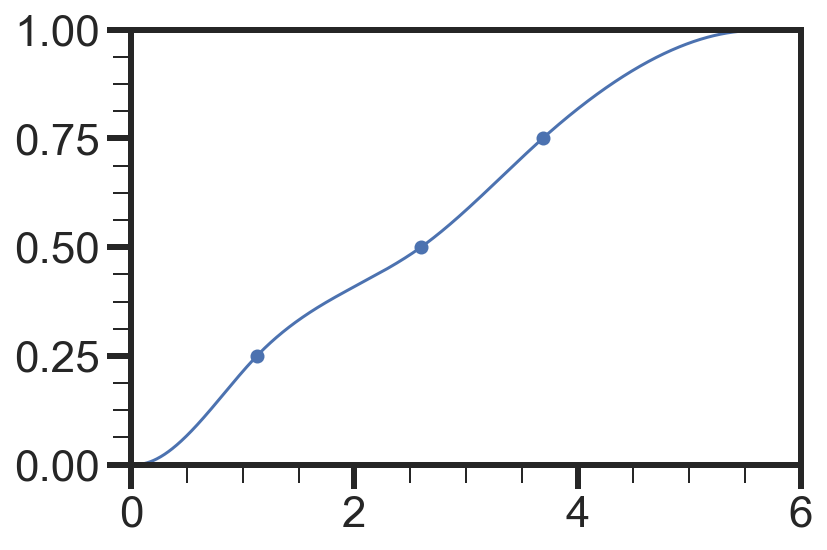

In [266]:
Nparam = 3
redshift = 1.0
logMstar = 0
logSFR = - 11

t25, t50, t75 = get_tx_vals(np.random.rand(3))

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, t25,t50,t75])

print(sfh_tuple, redshift)
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)
fig2 = db.plot_sfh(timeax, sfh)

plt.figure()
plt.plot(timeax, sfh)

plt.figure()
plt.plot(timeax, np.cumsum(sfh) / np.cumsum(sfh[::-1])[-1])
plt.scatter(timeax[-1]* np.array([t25,t50,t75]), np.array([0.25, 0.5, 0.75]))
plt.xlim(0,6)
plt.ylim(0,1)

In [256]:
.39 * 6

2.34

In [513]:
Nparam = 3
redshift = 1.0
logMstar = 0

logssfrs = np.arange(8,14,0.01)

SFH_grid = []

for xx in range(1000):
    logSFR = db.priors.sample_sSFR_prior(size=1)[0]

    t25, t50, t75 = get_tx_vals(np.random.rand(3))

    sfh_tuple = np.hstack([logMstar, logSFR, Nparam, t25,t50,t75])

    sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

    SFH_grid.append(sfh[::-1])
    
SFH_grid = np.array(SFH_grid)

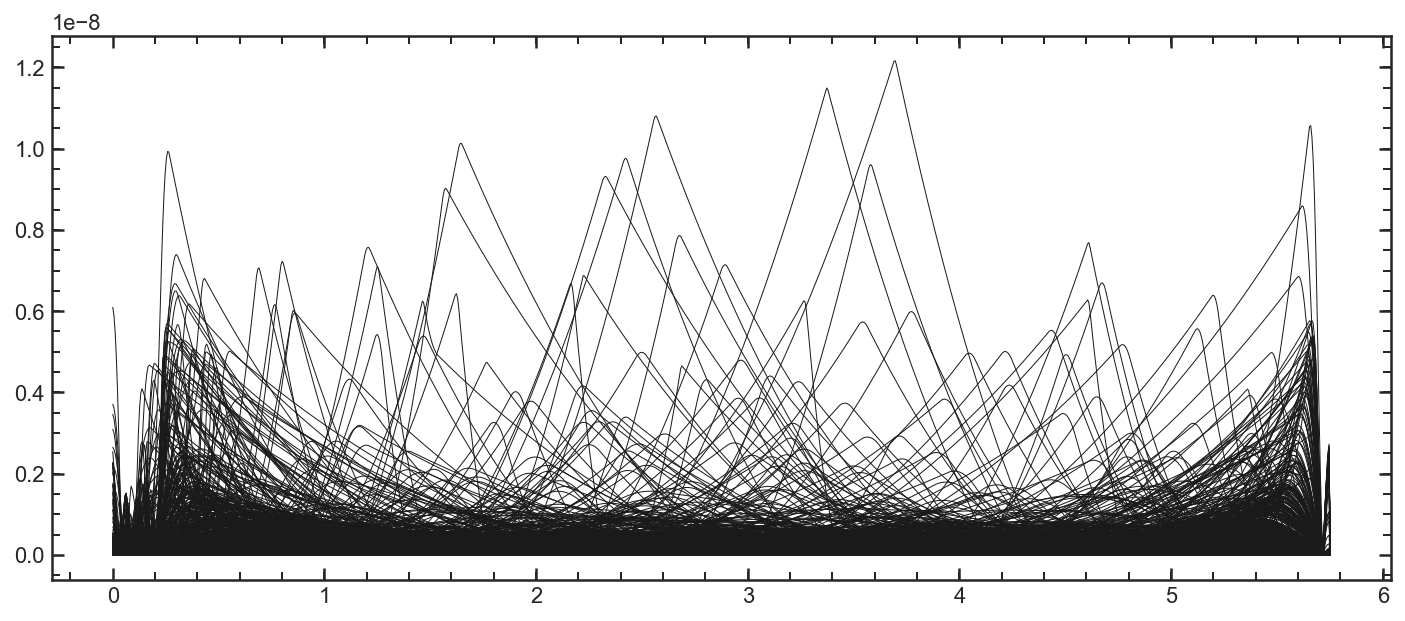

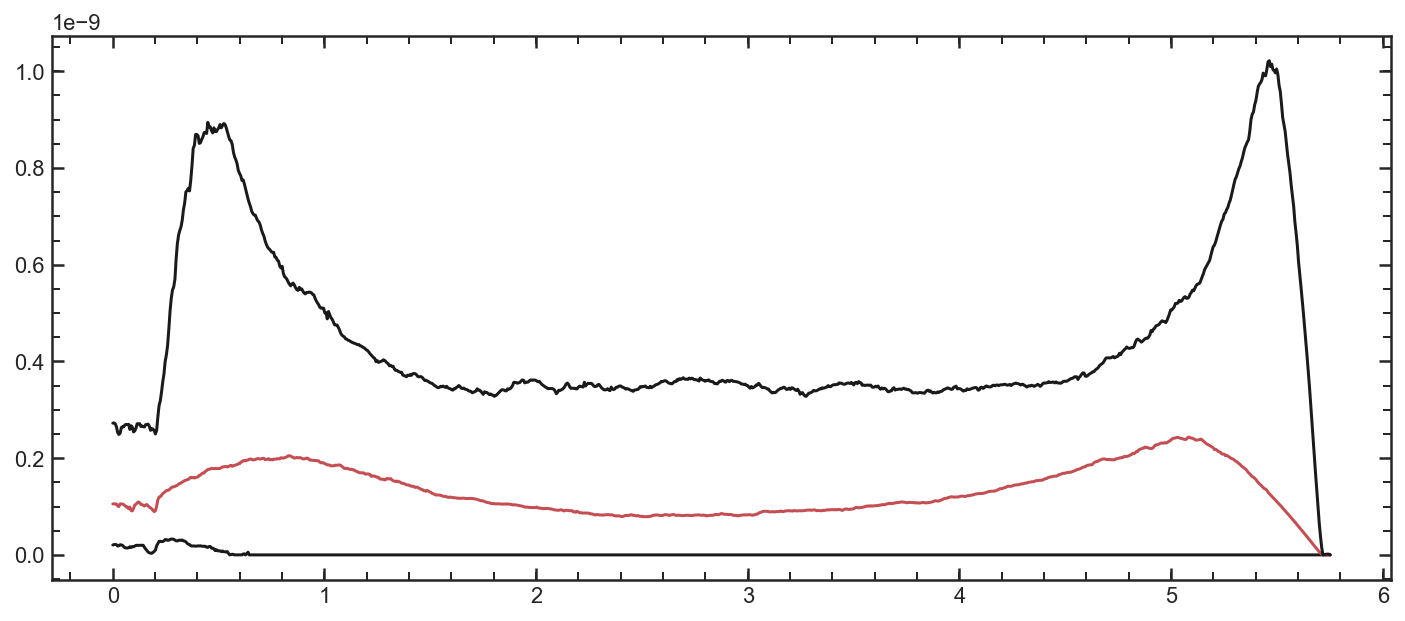

In [514]:
plt.figure(figsize=[12,5])
plt.plot(timeax, SFH_grid.T, 'k', linewidth = 0.5)
plt.figure(figsize=[12,5])
plt.plot(timeax, np.percentile(SFH_grid,16, axis=0), 'k')
plt.plot(timeax, np.percentile(SFH_grid,50, axis=0), 'r')
plt.plot(timeax, np.percentile(SFH_grid,84, axis=0), 'k')

In [263]:
logSFR

-10.00601742485294

In [206]:
db.priors.print_priors()

--------------Priors:--------------
The prior on log mass is uniform from 9.0 to 12.0.
The prior on log SFR_inst is uniform from 2.0 to -1.0.
The prior on tx is dirichlet with alpha = 5.0.
The prior on redshift is uniform from 0.9 to 1.1.
The prior on log metallicity/Zsolar is uniform from -1.5 to 0.5.
The prior on dust (model: Calzetti) is uniform with Av: 0.0 to 1.0.
-----------------------------------


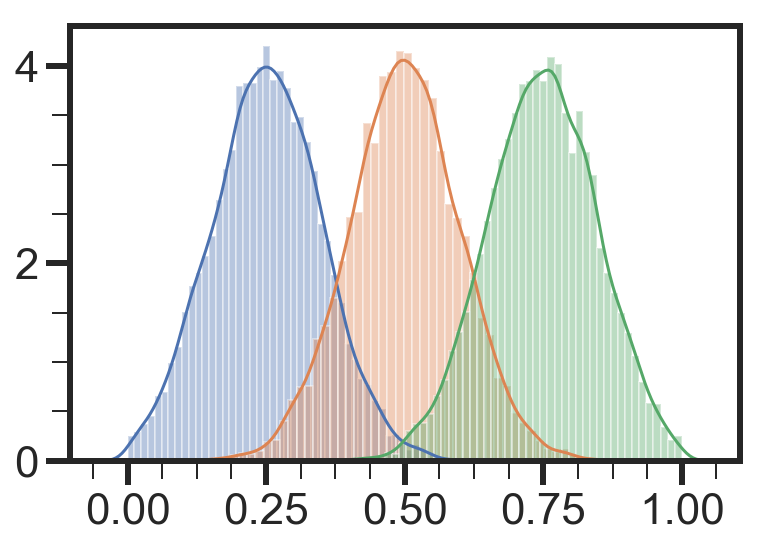

In [4]:
sea.distplot(Gaussian_prior(np.random.rand(10000), [0,1], 0.25, 0.1))
sea.distplot(Gaussian_prior(np.random.rand(10000), [0,1], 0.5, 0.1))
sea.distplot(Gaussian_prior(np.random.rand(10000), [0,1], 0.75, 0.1))

In [6]:
p75 = Gaussian_prior(np.random.rand(1), [0,1], 0.25, 0.2)
print(p75)
p50 = Gaussian_prior(np.random.rand(1), [p75,1], 0.5, 0.2)
print(p50)
p25 = Gaussian_prior(np.random.rand(1), [p50,1], 0.75, 0.2)
print(p25)

[0.11985156]
[0.55695507]
[0.80251882]


In [207]:
db.priors.squeeze_tx

True

In [164]:
temp_tx = np.cumsum(np.random.dirichlet(np.ones((Nparam+1,))*5, size=1))[0:-1]
randfac1 = np.random.random()
randfac2 = np.random.random()
temp_tx = temp_tx*(1-randfac1*0.5) + (randfac1*0.5)*randfac2


In [165]:
p1,p2,p3=db.priors.sample_tx_prior(100000).T

In [16]:
db.priors.print_priors()
# db.priors.tx_alpha

--------------Priors:--------------
The prior on log mass is uniform from 9.0 to 12.0.
The prior on log SFR_inst is uniform from 2.0 to -1.0.
The prior on tx is dirichlet with alpha = 5.0.
The prior on redshift is uniform from 0.9 to 1.1.
The prior on log metallicity/Zsolar is uniform from -1.5 to 0.5.
The prior on dust (model: Calzetti) is uniform with Av: 0.0 to 1.0.
-----------------------------------


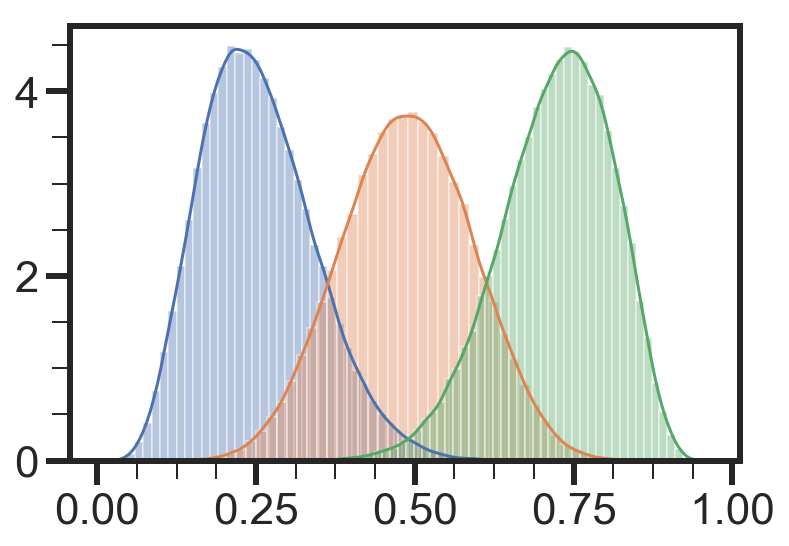

In [166]:
sea.distplot(p1)
sea.distplot(p2)
sea.distplot(p3)

In [245]:
from prospect.models import priors
p1 = np.zeros(10000)
p2 = np.zeros(10000)
p3 = np.zeros(10000)
ncomp = 4
alpha = np.arange(ncomp-1, 0, -1)          
for x in range(10000):
    z_fraction = stats.beta.ppf(q=np.random.rand(3), a = alpha*5, b=np.ones_like(alpha)*5)
    sfr_fraction = np.zeros(len(z_fraction) + 1)
    sfr_fraction[0] = 1.0 - z_fraction[0]
    for i in range(1, len(z_fraction)):
        sfr_fraction[i] = np.prod(z_fraction[:i]) * (1.0 - z_fraction[i])
    sfr_fraction[-1] = 1 - np.sum(sfr_fraction[:-1])
    p1[x], p2[x], p3[x] = from_rand_to_dval(sfr_fraction)

In [5]:
def get_tx_vals(rand_vals, ncomp = 4):
    alpha = np.arange(ncomp-1, 0, -1)
#     z_fraction = stats.beta.ppf(q=rand_vals, a = alpha*5, b=np.ones_like(alpha)*5)
    z_fraction = stats.beta.ppf(q=rand_vals, a = alpha*1, b=np.ones_like(alpha)*1)
    
    sfr_fraction = np.zeros(len(z_fraction) + 1)
    sfr_fraction[0] = 1.0 - z_fraction[0]
    for i in range(1, len(z_fraction)):
        sfr_fraction[i] = np.prod(z_fraction[:i]) * (1.0 - z_fraction[i])
    sfr_fraction[-1] = 1 - np.sum(sfr_fraction[:-1])
    return from_rand_to_dval(sfr_fraction)

def from_rand_to_dval(rvals):
    dvals = np.array([U/np.sum(rvals)  for U in rvals])
    x = []
    for i in range(len(dvals)):
        x.append(np.sum(dvals[0:i+1]))
    
    return x[:-1]

In [415]:
p1 = np.zeros(10000)
p2 = np.zeros(10000)
p3 = np.zeros(10000)
        
for x in range(10000):
    p1[x], p2[x], p3[x] = get_tx_vals(np.random.rand(3))

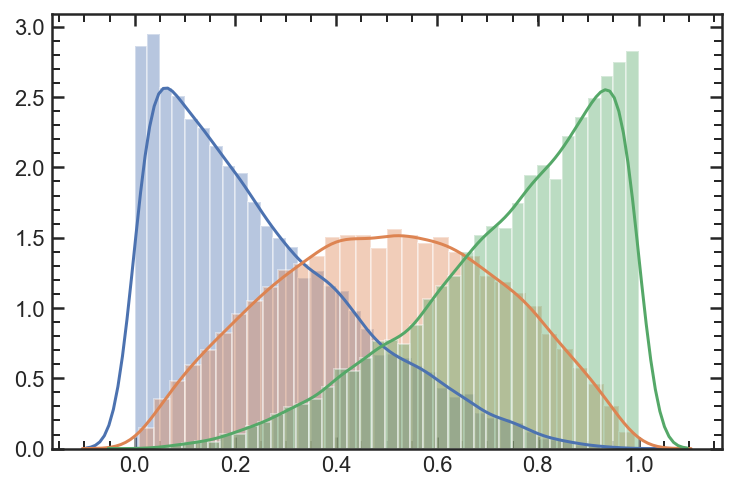

In [417]:
sea.distplot(p1, hist = True)
sea.distplot(p2, hist = True)
sea.distplot(p3, hist = True)

In [100]:
p1 = np.zeros(100000)
p2 = np.zeros(100000)
p3 = np.zeros(100000)

for x in range(100000):
    temp_tx = np.cumsum(np.random.dirichlet(np.ones((Nparam+1,))*5, size=1))[0:-1]
#     temp_tx = np.cumsum(np.random.dirichlet(np.ones((Nparam))*5, size=1))
    
#     randfac1 = np.random.random()
#     randfac2 = np.random.random()
    
    randfac1 = 0.25
    randfac2 = 0.75
    p1[x], p2[x], p3[x] = temp_tx*(1-randfac1*0.5) + (randfac1*0.5)*randfac2


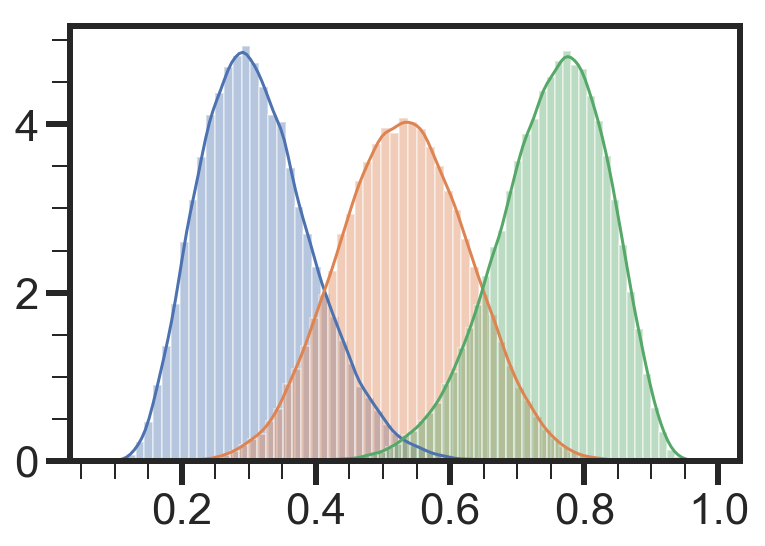

In [101]:
sea.distplot(p1)
sea.distplot(p2)
sea.distplot(p3)

In [117]:
def from_rand_to_dval(rvals):
    dvals = np.array([U/np.sum(rvals)  for U in rvals])
    x = []
    for i in range(len(dvals)):
        x.append(np.sum(dvals[0:i+1]))
    
    return x[:-1]

randvals = np.cumsum(stats.gamma.rvs(np.random.rand(4), 5))
dvals = np.array([U/np.sum(randvals)  for U in randvals])
    
print(randvals,from_rand_to_dval(randvals))
    

[0.00018804 0.00021089 0.00164623 0.00164629] [0.05093900075911289, 0.1080690154642816, 0.5540257889410365]


In [123]:
params = [5,5,5]
sample = [stats.gamma.rvs(5, 1) for a in params]
sample = [v / sum(sample) for v in sample]

In [434]:
fitdb = np.load('../data/posteriors/GSD_39170_KI.npy', allow_pickle = True).item()
fitdb2 = np.load('../data/GSD_39170_KI.npy', allow_pickle = True).item()

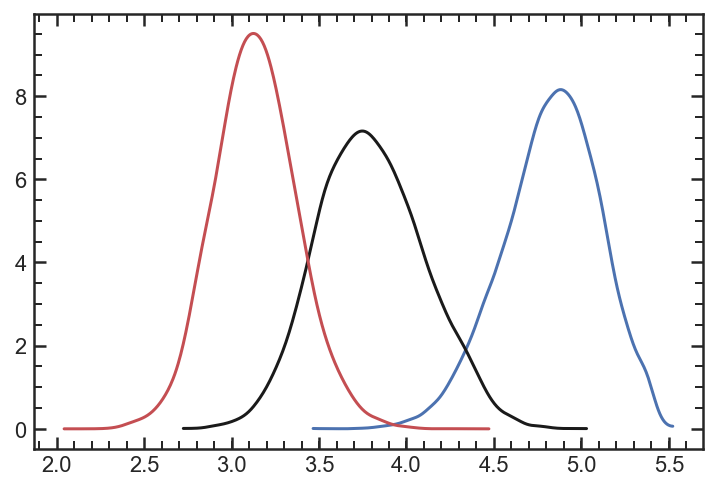

In [435]:
plt.plot(cosmo.age(fitdb['bfz']).value - fitdb['t25']*cosmo.age(fitdb['bfz']).value,fitdb['Pt25'],'b')
plt.plot(cosmo.age(fitdb['bfz']).value - fitdb['t50']*cosmo.age(fitdb['bfz']).value,fitdb['Pt50'],'k')
plt.plot(cosmo.age(fitdb['bfz']).value - fitdb['t75']*cosmo.age(fitdb['bfz']).value,fitdb['Pt75'],'r')

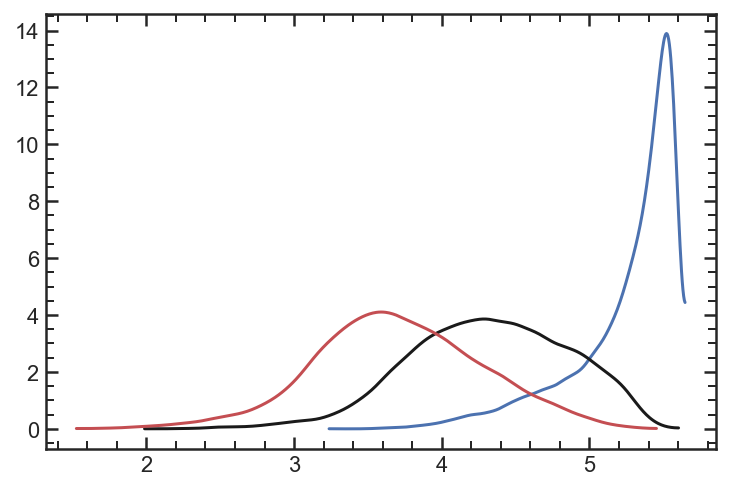

In [436]:
plt.plot(cosmo.age(fitdb2['bfz']).value - fitdb2['t25']*cosmo.age(fitdb2['bfz']).value,fitdb2['Pt25'],'b')
plt.plot(cosmo.age(fitdb2['bfz']).value - fitdb2['t50']*cosmo.age(fitdb2['bfz']).value,fitdb2['Pt50'],'k')
plt.plot(cosmo.age(fitdb2['bfz']).value - fitdb2['t75']*cosmo.age(fitdb2['bfz']).value,fitdb2['Pt75'],'r')

In [437]:
from spec_stats import Highest_density_region
X = cosmo.age(fitdb['bfz']).value - fitdb['t50']*cosmo.age(fitdb['bfz']).value
X = X[::-1]
PX = fitdb['Pt50'] / np.trapz(fitdb['Pt50'] , X)
PX = PX[::-1]
Highest_density_region(PX, X)

(3.7451082942373546, [3.4586299729149848, 4.082413414504016], array([0.]))

In [438]:
from spec_stats import Highest_density_region
X = cosmo.age(fitdb2['bfz']).value - fitdb2['t50']*cosmo.age(fitdb2['bfz']).value
X = X[::-1]
PX = fitdb2['Pt50'] / np.trapz(fitdb2['Pt50'] , X)
PX = PX[::-1]
Highest_density_region(PX, X)

(4.284422559571551, [3.7989618504372062, 4.922042595449496], array([0.]))

In [439]:
adb.query('id == 39170').t_50, adb.query('id == 39170').t_50_hdr

(148    4.948283
 Name: t_50, dtype: float64, 148    [4.633099909600859, 5.150631067954293]
 Name: t_50_hdr, dtype: object)

In [321]:
(3.75 - 4.95) / 4.95

-0.24242424242424246

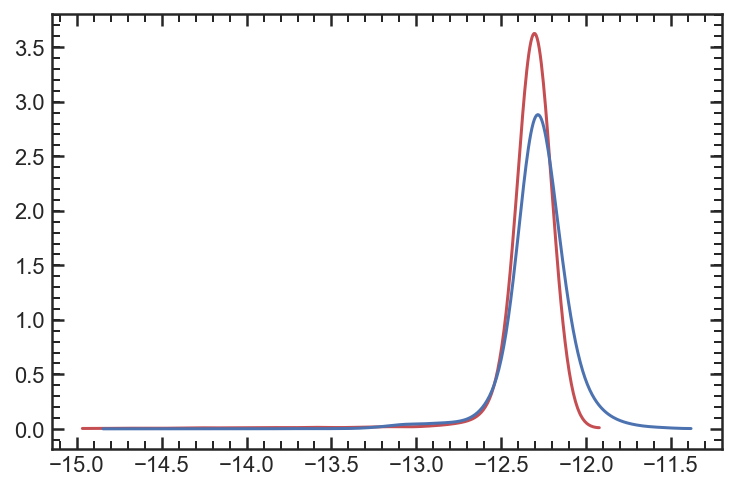

In [441]:
plt.plot(fitdb['logssfr'],fitdb['Plogssfr'],'r')
plt.plot(fitdb2['logssfr'],fitdb2['Plogssfr'],'b')

In [286]:
adb = pd.read_pickle('../dataframes/fitdb/evolution_db.pkl')

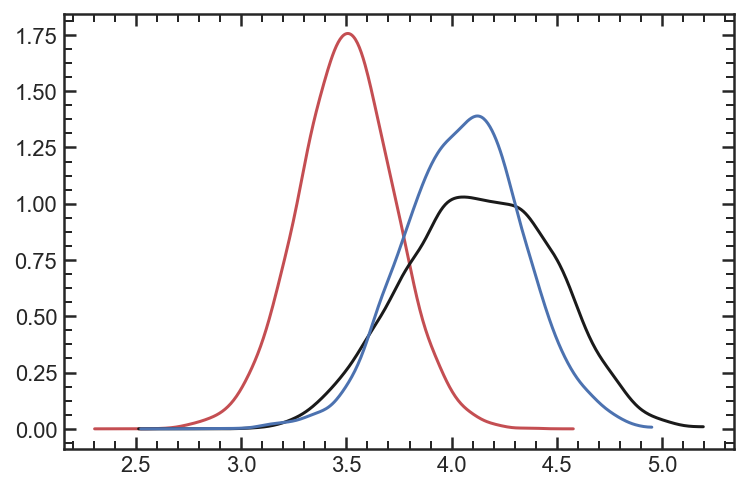

In [442]:
plt.plot(fitdb['lwa_g'],fitdb['Plwa_g'],'r')
plt.plot(fitdb2['lwa_g'],fitdb2['Plwa_g'],'k')

x,px = np.load('../data/posteriors/GSD_39170_tabfit_Plwa.npy')
plt.plot(x,px)

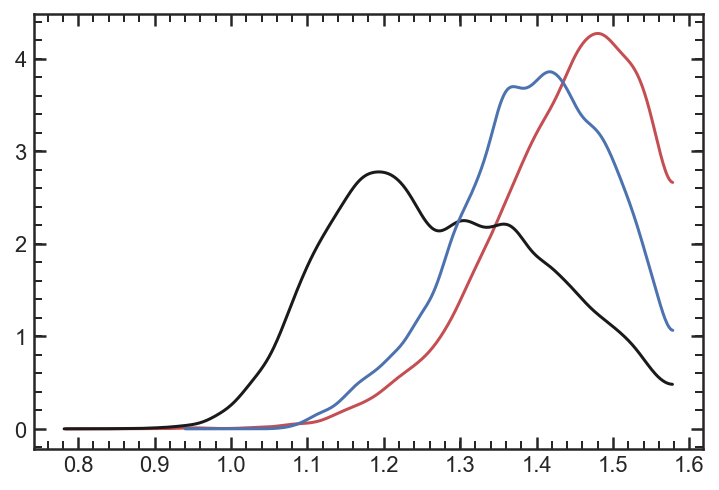

In [445]:
plt.plot(fitdb['m'],fitdb['Pm'],'r')
plt.plot(fitdb2['m'],fitdb2['Pm'],'k')

x,px = np.load('../data/posteriors/GSD_39170_tabfit_Pm.npy')
plt.plot(x,px)

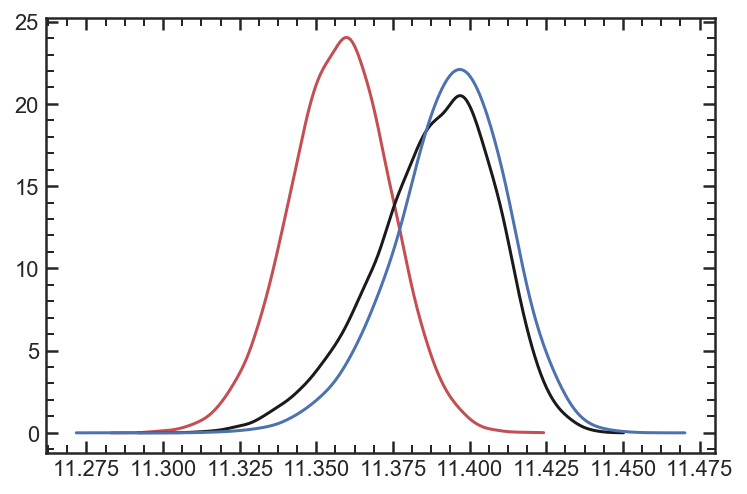

In [443]:
plt.plot(fitdb['lmass'],fitdb['Plmass'],'r')
plt.plot(fitdb2['lmass'],fitdb2['Plmass'],'k')

x,px = np.load('../data/posteriors/GSD_39170_tabfit_Plm.npy')
plt.plot(x,px)

In [340]:
print(Highest_density_region(fitdb['Pt25'], fitdb['t25']))
print(Highest_density_region(fitdb['Pt50'], fitdb['t50']))
print(Highest_density_region(fitdb['Pt75'], fitdb['t75']))
print(Highest_density_region(fitdb['Plogssfr'], fitdb['logssfr']))
print(Highest_density_region(fitdb['Pz'], fitdb['z']))

(0.13733534354841165, [0.09142949033897674, 0.1897991757877658], array([0.]))
(0.3379146071696104, [0.2782835429894138, 0.3885601685281335], array([0.]))
(0.4478922536773187, [0.40486409551996033, 0.4891992855083827], array([0.]))
(-12.306492025907787, [-12.416362647784085, -12.190517480593913], array([0.]))
(1.0241706135538897, [1.02283484243301, 1.0251056533385055], array([0.28703725]))


In [341]:
sfh_tuple = np.hstack([0, -12.3, 3, 0.13,0.33,0.44])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, 1.024)

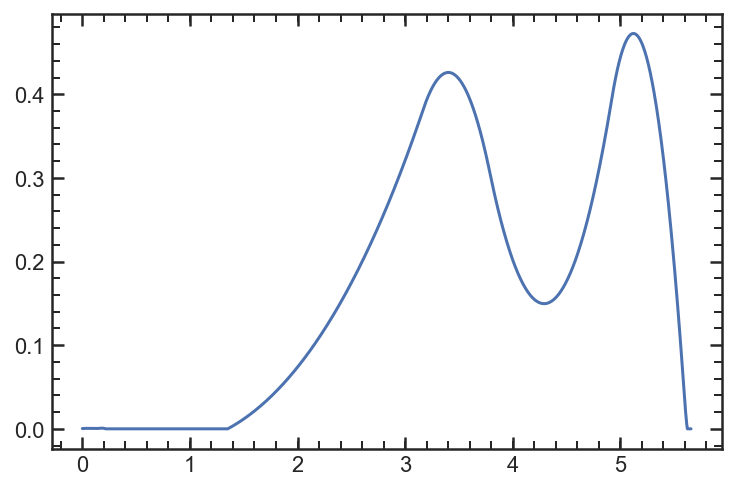

In [348]:
SFH = (sfh/np.trapz(sfh,timeax))[::-1]
plt.plot(timeax, SFH)

In [388]:
from spec_tools import Gen_PPF, Oldest_galaxy, Derive_SFH_weights, boot_to_posterior, z_at_value
import astropy.units as u
class Gen_SFH_KI(object):
    def __init__(self, file, rshift, trials = 1000):
        ppf_dict = {}
        fit_db = np.load(file, allow_pickle = True).item()

        params = ['t25', 't50', 't75', 'logssfr', 'lmass']
        P_params = ['Pt25', 'Pt50', 'Pt75', 'Plogssfr', 'Plmass']
                     
        for i in range(len(params)):
            x = fit_db[params[i]]
            px = fit_db[P_params[i]]
            ppf_dict[params[i]] = Gen_PPF(x,px)

        idx = 0

        sfr_grid = []
        t_90_grid = []
        
        while idx < trials:
            try:
                draw = np.zeros(len(params))

                for i in range(len(draw)):
                    draw[i] = ppf_dict[params[i]](np.random.rand(1))[0]

                t25, t50, t75 = draw[0:3]
                lmass = draw[-1]
                log_ssfr = draw[3]
                log_sfr = np.log10(10**log_ssfr * 10**lmass)
                
                sfh_tuple = np.hstack([lmass, log_sfr, 3, t25,t50,t75])
                sfh, timeax = db.tuple_to_sfh(sfh_tuple, rshift)
                
                sfr_grid.append(sfh[::-1])
                
                SFH = (sfh/np.trapz(sfh,timeax))[::-1]
                ICSFH = interp1d((np.cumsum(SFH[::-1]) /np.cumsum(SFH[::-1])[-1])[::-1],timeax)
                t_90_grid.append(ICSFH(0.9))

                idx +=1
            except:
                pass
        SFH = []
        SFH_16 = []
        SFH_84 = []

        self.SFH = np.percentile(sfr_grid,50, axis=0)
        self.SFH_16 = np.percentile(sfr_grid,16, axis=0)
        self.SFH_84 = np.percentile(sfr_grid,84, axis=0)
        self.LBT = np.array(timeax)
        
        self.sfr_grid = np.array(sfr_grid)

        weights = Derive_SFH_weights(self.SFH, sfr_grid[0:trials])
       
        ####### t values
        x,y = boot_to_posterior(t_90_grid[0:trials], weights)
        self.t_90, self.t_90_hci, self.t_90_offreg = Highest_density_region(y,x)
        self.t_90 = interp1d(np.cumsum(self.SFH[::-1]) / np.cumsum(self.SFH[::-1])[-1],self.LBT[::-1])(0.9)

        ####### z values                       
        self.z_90 = z_at_value(cosmo.age,(Oldest_galaxy(rshift) - self.t_90)*u.Gyr)
        hci=[]
        for lims in self.t_90_hci:
            hci.append(z_at_value(cosmo.age,(Oldest_galaxy(rshift) - lims)*u.Gyr))
        self.z_90_hci = np.array(hci)
        self.z_90_offreg = np.array(self.t_90_offreg)

In [446]:
SFH = Gen_SFH_KI('../data/GSD_39170_KI.npy', 1.024)

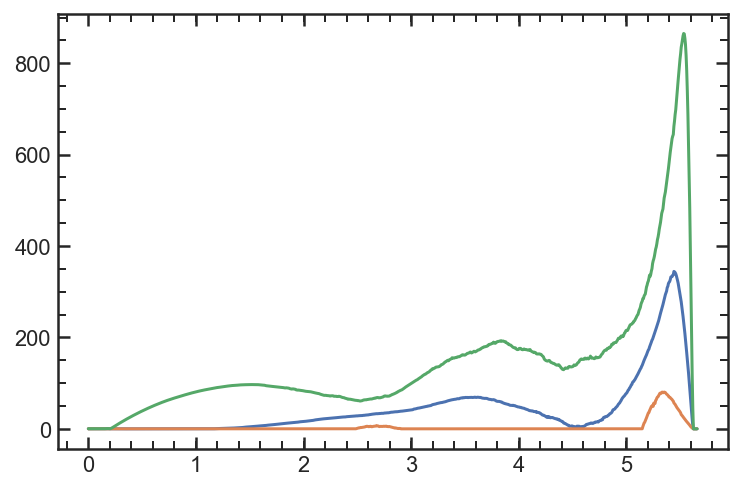

In [447]:
plt.plot(SFH.LBT, SFH.SFH)
plt.plot(SFH.LBT, SFH.SFH_16)
plt.plot(SFH.LBT, SFH.SFH_84)

In [452]:
from spec_id import logsfr_ratios_to_masses, convert_sfh, get_agebins
from time import time
Nparam = 3
redshift = 1.0
logMstar = 0

logssfrs = np.arange(8,14,0.01)

SFH_grid = []

start = time()
for xx in range(1000):
    logSFR = db.priors.sample_sSFR_prior(size=1)[0]
    t25, t50, t75 = get_tx_vals(np.random.rand(3))
    sfh_tuple = np.hstack([logMstar, logSFR, Nparam, t25,t50,t75])
    sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)
end = time()
print(end - start)

start = time()
for xx in range(1000):
    taus = stats.t.ppf( q = np.random.rand(10), loc = 0, scale = 0.3, df =2.)
    m1, m2, m3, m4, m5, m6, m7, m8, m9, m10 = logsfr_ratios_to_masses(logmass = 0, logsfr_ratios = taus, agebins = get_agebins(5))
    t, sfr, tmax = convert_sfh(get_agebins(5), [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10], maxage = 5*1E9)
end = time()
print(end - start)

9.231098890304565
1.2633960247039795


In [483]:
Nparam = 3
redshift = 1.0
logMstar = 0

logssfrs = np.arange(8,14,0.01)

SFH_grid = []

start = time()
for xx in range(10000):
    logSFR = db.priors.sample_sSFR_prior(size=1)[0]
    t25, t50, t75 = get_tx_vals(np.random.rand(3))
    sfh_tuple = np.hstack([logMstar, logSFR, Nparam, t25,t50,t75])
    sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)
end = time()
print(end - start)

Nparam = 3
redshift = 1.0
logMstar = 0

logssfrs = np.arange(8,14,0.01)

SFH_grid = []

start = time()
for xx in range(10000):
    logSFR = db.priors.sample_sSFR_prior(size=1)[0]
    t25, t50, t75 = get_tx_vals(np.random.rand(3))
    sfh_tuple = np.hstack([logMstar, logSFR, Nparam, t25,t50,t75])
    sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift, interpolator='linear')
end = time()
print(end - start)

Nparam = 3
redshift = 1.0
logMstar = 0

logssfrs = np.arange(8,14,0.01)

SFH_grid = []

start = time()
for xx in range(10000):
    logSFR = db.priors.sample_sSFR_prior(size=1)[0]
    t25, t50, t75 = get_tx_vals(np.random.rand(3))
    sfh_tuple = np.hstack([logMstar, logSFR, Nparam, t25,t50,t75])
    sfh, timeax = tuple_to_sfh_test(sfh_tuple, redshift)
end = time()
print(end - start)

104.84244799613953
49.56359791755676
67.37263894081116


In [30]:
%%timeit
sfh, timeax = tuple_to_sfh_test(sfh_tuple, redshift)

4.05 ms ± 80.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [488]:
%%timeit
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

18.5 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [489]:
%%timeit
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift, interpolator='linear')

10.7 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [504]:
%%timeit
t, sfr, tmax = convert_sfh(get_agebins(5), [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10], maxage = 5*1E9)

510 µs ± 113 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
import george
from george import kernels
def gp_interpolator(x,y,res = 1000, Nparam = 3):
    
    yerr = np.zeros_like(y)
    yerr[2:(2+Nparam)] = 0.001/np.sqrt(Nparam)
    if len(yerr) > 26:
        yerr[2:(2+Nparam)] = 0.1/np.sqrt(Nparam)

    #kernel = np.var(yax) * kernels.ExpSquaredKernel(np.median(yax)+np.std(yax))
    #k2 = np.var(yax) * kernels.LinearKernel(np.median(yax),order=1)
    #kernel = np.var(y) * kernels.Matern32Kernel(np.median(y)) #+ k2
    kernel = np.var(y) * (kernels.Matern32Kernel(np.median(y)) + kernels.LinearKernel(np.median(y), order=2))
    gp = george.GP(kernel)

    #print(xax.shape, yerr.shape)

    gp.compute(x.ravel(), yerr.ravel())

    x_pred = np.linspace(np.amin(x), np.amax(x), res)
    y_pred, pred_var = gp.predict(y.ravel(), x_pred, return_var=True)
    return x_pred, y_pred

def tuple_to_sfh_stand_alone(sfh_tuple, zval):
    mass_quantiles = np.array([0., 0.,  0.25, 0.5,  0.75,1.,1.,1.,1., 1.  ])
    time_quantiles = np.array([0,0.01,sfh_tuple[3],sfh_tuple[4],sfh_tuple[5],0.96,0.97,0.98,0.99,1])

    time_arr_interp, mass_arr_interp = gp_interpolator(time_quantiles, mass_quantiles, Nparam = 3)
    sfh_scale = 10**(sfh_tuple[0])/(cosmo.age(zval).value*1e9/1000)
    sfh = np.diff(mass_arr_interp)*sfh_scale
    sfh[sfh<0] = 0
    sfh = np.insert(sfh,0,[0])

    return sfh, time_arr_interp * cosmo.age(zval).value

In [6]:
def tuple_to_sfh(sfh_tuple, zval, interpolator = 'gp_george', set_sfr_100Myr = False, vb = False):
    # generate an SFH from an input tuple (Mass, SFR, {tx}) at a specified redshift
    
    
    Nparam = int(sfh_tuple[2])
    mass_quantiles = np.linspace(0,1,Nparam+2)
    time_quantiles = np.zeros_like(mass_quantiles)
    time_quantiles[-1] = 1
    time_quantiles[1:-1] = sfh_tuple[3:]

    # now add SFR constraints
    
    # SFR smoothly increasing from 0 at the big bang
    mass_quantiles = np.insert(mass_quantiles,1,[0.00])
    time_quantiles = np.insert(time_quantiles,1,[0.01])
    
    # SFR constrained to SFR_inst at the time of observation
    SFH_constraint_percentiles = np.array([0.96,0.97,0.98,0.99])
    for const_vals in SFH_constraint_percentiles:
        
        delta_mstar = 10**(sfh_tuple[0]) *(1-const_vals)
        delta_t = 1 - delta_mstar/(10**sfh_tuple[1])/(cosmo.age(zval).value*1e9)
        
        if (delta_t > time_quantiles[-2]) & (delta_t > 0.9):
            mass_quantiles = np.insert(mass_quantiles, -1, [const_vals], )
            time_quantiles = np.insert(time_quantiles, -1, [delta_t],)
            print('XXXXX')
        else:
            delta_m = 1 - ((cosmo.age(zval).value*1e9)*(1-const_vals)*(10**sfh_tuple[1]))/(10**sfh_tuple[0])
            time_quantiles = np.insert(time_quantiles, -1, [const_vals]) 
            mass_quantiles=  np.insert(mass_quantiles, -1, [delta_m])
    
#     print(time_quantiles, mass_quantiles, Nparam    )
    
    if interpolator == 'gp_george':
        time_arr_interp, mass_arr_interp = gp_interpolator(time_quantiles, mass_quantiles, Nparam = int(Nparam))
    elif interpolator == 'gp_sklearn':
        time_arr_interp, mass_arr_interp = gp_sklearn_interpolator(time_quantiles, mass_quantiles)
    elif interpolator == 'linear':
        time_arr_interp, mass_arr_interp = linear_interpolator(time_quantiles, mass_quantiles)
    elif interpolator == 'pchip':
        time_arr_interp, mass_arr_interp = Pchip_interpolator(time_quantiles, mass_quantiles)
    else:
        raise Exception('specified interpolator does not exist: {}. \n use one of the following: gp_george, gp_sklearn, linear, and pchip '.format(interpolator))
    
    sfh_scale = 10**(sfh_tuple[0])/(cosmo.age(zval).value*1e9/1000)
    sfh = np.diff(mass_arr_interp)*sfh_scale
    sfh[sfh<0] = 0
    sfh = np.insert(sfh,0,[0])
#     print(sfh)
#     plt.figure()
#     plt.plot(mass_arr_interp)

    if set_sfr_100Myr == True:
        time_100Myr = np.argmin(np.abs(time_arr_interp*cosmo.age(zval).value - 0.1))
        sfh[-time_100Myr:] = 10**sfh_tuple[1] 
    timeax = time_arr_interp * cosmo.age(zval).value
    
    if vb == True:
        print('time and mass quantiles:')
        print(time_quantiles, mass_quantiles)
        plt.plot(time_quantiles, mass_quantiles,'--o')
        plt.plot(time_arr_interp, mass_arr_interp)
        plt.axis([0,1,0,1])
        #plt.axis([0.9,1.05,0.9,1.05])
        plt.show()

        print('instantaneous SFR: %.1f' %sfh[-1])
        plt.plot(np.amax(time_arr_interp) - time_arr_interp, sfh)
        #plt.xscale('log')
        plt.show()
        
    return sfh, timeax


In [8]:
# logSFR = db.priors.sample_sSFR_prior(size=1)[0]
t25, t50, t75 = get_tx_vals(np.random.rand(3))
sfh_tuple = np.hstack([11, -11, 3, t25,t50,t75])
sfh1, timeax = tuple_to_sfh_stand_alone(sfh_tuple, 1)

In [28]:
# logSFR = db.priors.sample_sSFR_prior(size=1)[0]
# t25, t50, t75 = get_tx_vals(np.random.rand(3))
# sfh_tuple = np.hstack([11, -11, Nparam, t25,t50,t75])
sfh2, timeax = tuple_to_sfh(sfh_tuple, 1)

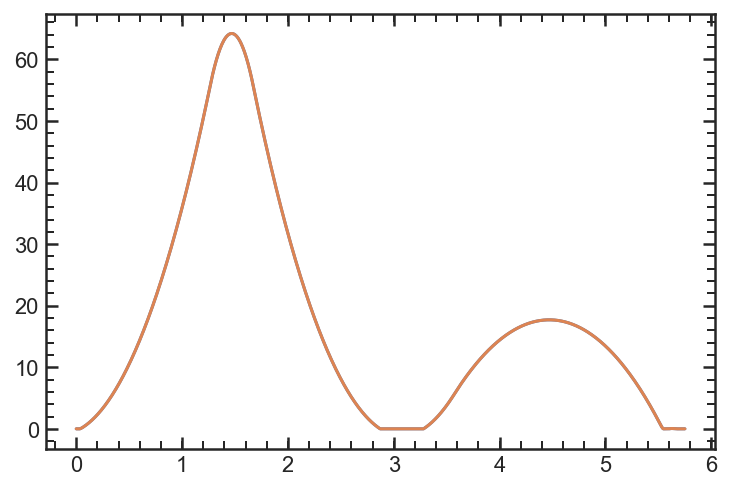

In [29]:
plt.plot(timeax, sfh1)
plt.plot(timeax,sfh2)

In [2]:
import george
from george import kernels
def gp_interpolator(x,y,res = 1000, Nparam = 3):
    
    yerr = np.zeros_like(y)
    yerr[2:(2+Nparam)] = 0.001/np.sqrt(Nparam)
    if len(yerr) > 26:
        yerr[2:(2+Nparam)] = 0.1/np.sqrt(Nparam)

    #kernel = np.var(yax) * kernels.ExpSquaredKernel(np.median(yax)+np.std(yax))
    #k2 = np.var(yax) * kernels.LinearKernel(np.median(yax),order=1)
    #kernel = np.var(y) * kernels.Matern32Kernel(np.median(y)) #+ k2
    kernel = np.var(y) * (kernels.Matern32Kernel(np.median(y)) + kernels.LinearKernel(np.median(y), order=2))
    gp = george.GP(kernel)

    #print(xax.shape, yerr.shape)

    gp.compute(x.ravel(), yerr.ravel())

    x_pred = np.linspace(np.amin(x), np.amax(x), res)
    y_pred, pred_var = gp.predict(y.ravel(), x_pred, return_var=True)
    return x_pred, y_pred

def gp_sklearn_interpolator(x,y,res = 1000):
    
    kernel = DotProduct(10.0, (1e-2,1e2)) *RationalQuadratic(0.1)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gp.fit(x.reshape(-1,1),(y-x).reshape(-1,1))

    x_pred = np.linspace(0,1,1000)
    y_pred, sigma = gp.predict(x_pred[:,np.newaxis], return_std=True)
    y_pred = y_pred.ravel() + x_pred

    return x_pred, y_pred

def linear_interpolator(x,y,res = 1000):
    
    interpolator = interp1d(x,y)
    x_pred = np.linspace(np.amin(x), np.amax(x), res)
    y_pred = interpolator(x_pred)
    
    return x_pred, y_pred

def Pchip_interpolator(x,y,res = 1000):
    
    interpolator = PchipInterpolator(x,y)
    x_pred = np.linspace(np.amin(x), np.amax(x), res)
    y_pred = interpolator(x_pred)
    
    return x_pred, y_pred

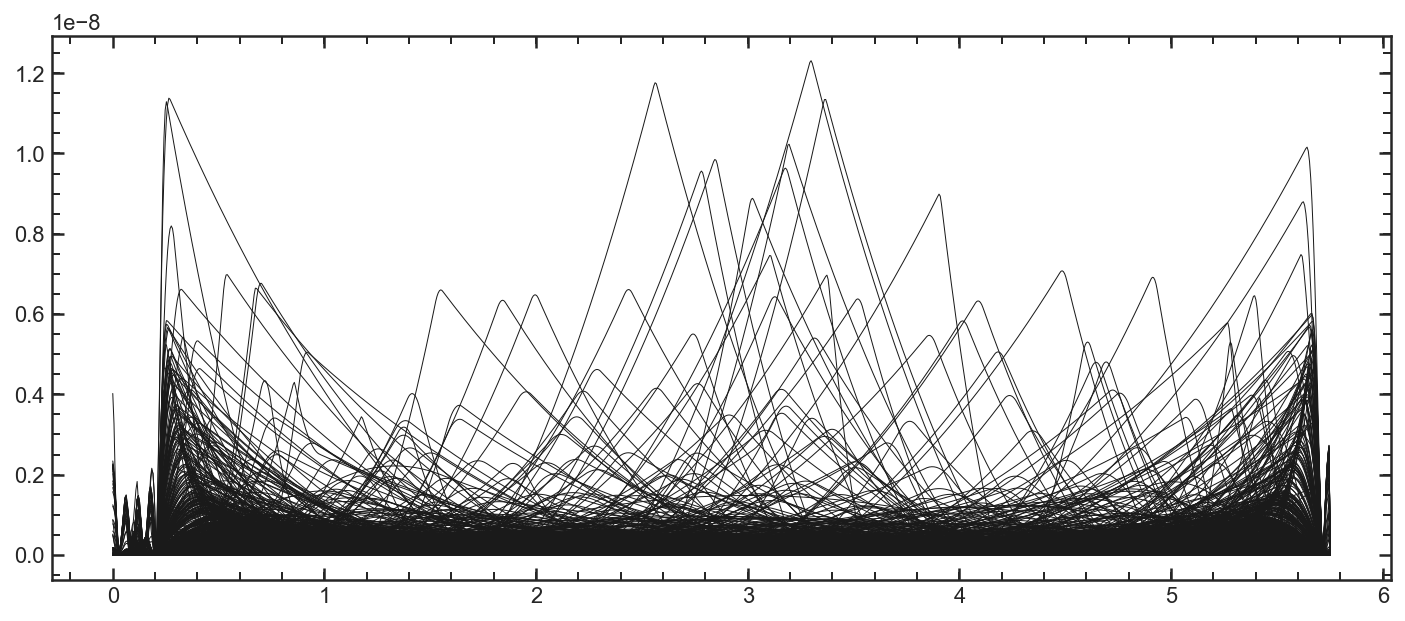

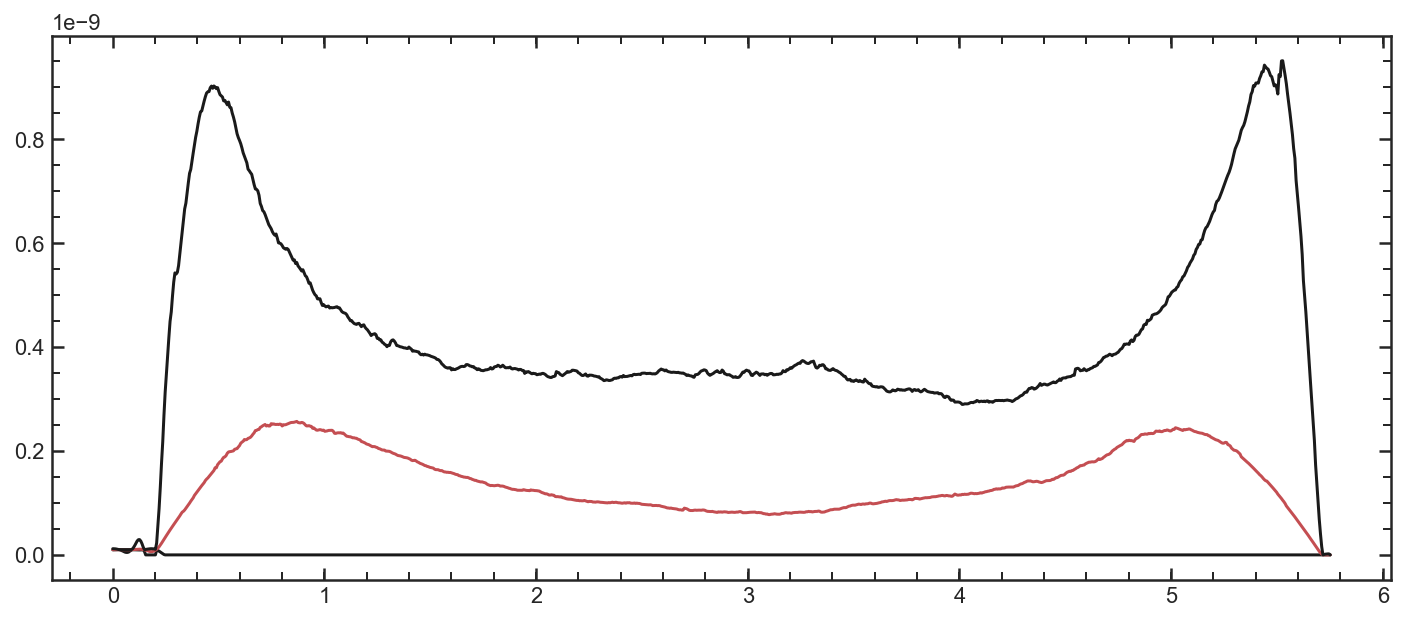

In [22]:
Nparam = 3
redshift = 1.0
logMstar = 0

SFH_grid = []

for xx in range(1000):
    t25, t50, t75 = get_tx_vals(np.random.rand(3))

    sfh_tuple = np.hstack([0, -11, Nparam, t25,t50,t75])

    sfh, timeax = tuple_to_sfh(sfh_tuple, redshift)

    SFH_grid.append(sfh[::-1])
    
SFH_grid = np.array(SFH_grid)

plt.figure(figsize=[12,5])
plt.plot(timeax, SFH_grid.T, 'k', linewidth = 0.5)
plt.figure(figsize=[12,5])
plt.plot(timeax, np.percentile(SFH_grid,16, axis=0), 'k')
plt.plot(timeax, np.percentile(SFH_grid,50, axis=0), 'r')
plt.plot(timeax, np.percentile(SFH_grid,84, axis=0), 'k')

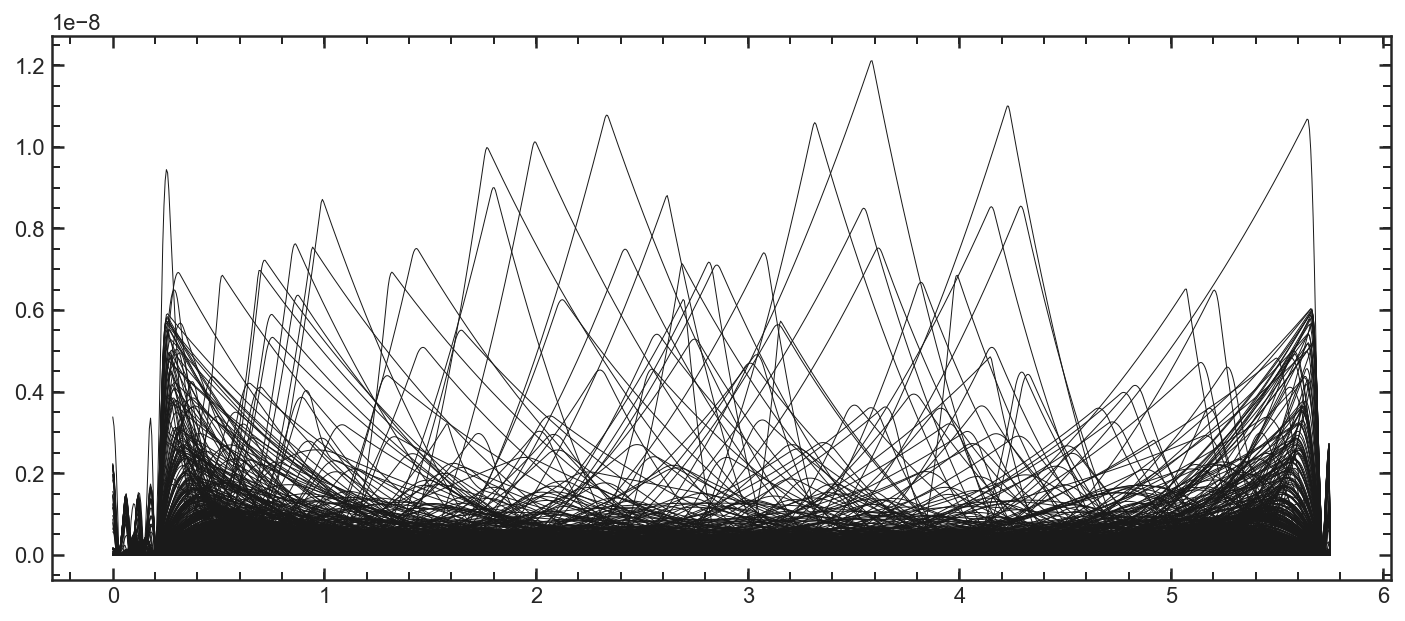

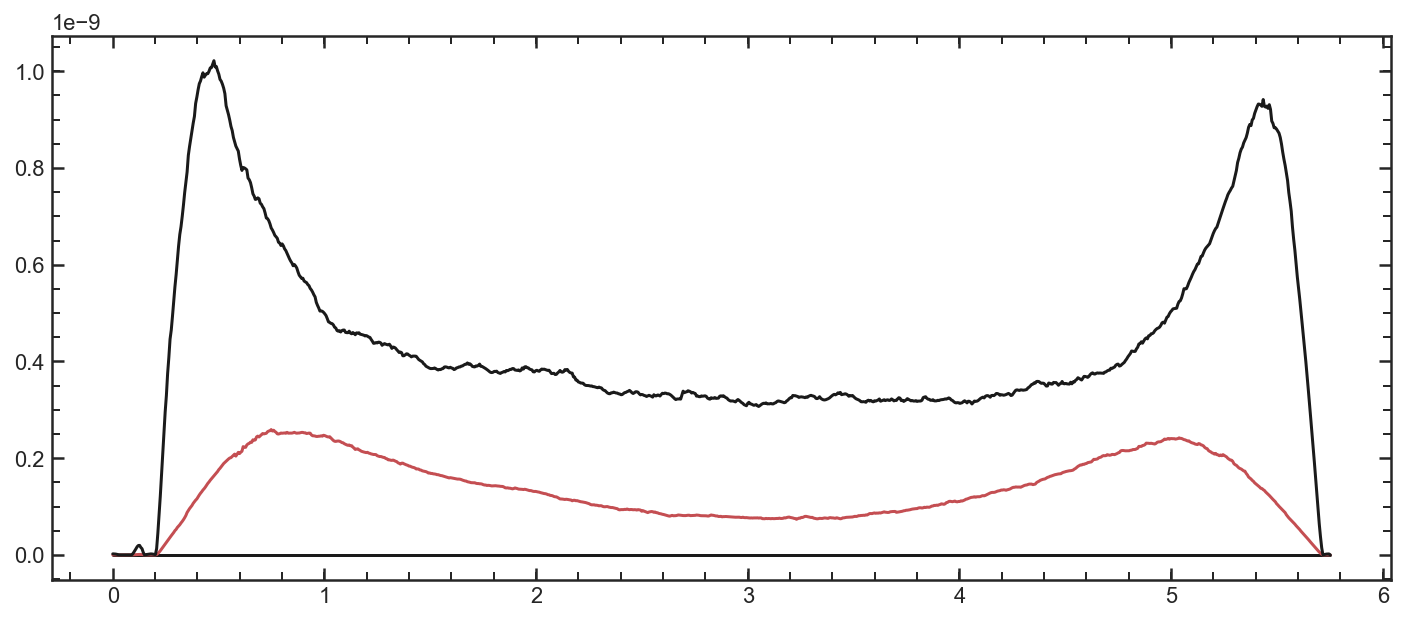

In [23]:
Nparam = 3
redshift = 1.0
logMstar = 0

SFH_grid = []

for xx in range(1000):
    t25, t50, t75 = get_tx_vals(np.random.rand(3))

    sfh_tuple = np.hstack([0, -11, Nparam, t25,t50,t75])

    sfh, timeax = tuple_to_sfh_test(sfh_tuple, redshift)
    SFH_grid.append(sfh[::-1])
    
SFH_grid = np.array(SFH_grid)

plt.figure(figsize=[12,5])
plt.plot(timeax, SFH_grid.T, 'k', linewidth = 0.5)
plt.figure(figsize=[12,5])
plt.plot(timeax, np.percentile(SFH_grid,16, axis=0), 'k')
plt.plot(timeax, np.percentile(SFH_grid,50, axis=0), 'r')
plt.plot(timeax, np.percentile(SFH_grid,84, axis=0), 'k')

In [14]:
from spec_id import F_lam_per_M
class F_lam_per_M(object):
    def __init__(self, obs_wave, flux, z, Av = 0, m_star = 1):
        """
        ** must have cosmo defined (astropy.cosmology)**
        obs_wave - redshifted wavelength in angstrom
        rst_wave - restframe wavelenth in angstrom
        flux - fsps model flux
        z - redshift
        Av - dust Av value
        m_star - stellar mass percentage (use sp.stellar_mass)
        """
        self.obs_wave = obs_wave
        self.rst_wave = obs_wave / (1 + z)
        self.flux = flux 
        self.z = z
        self.Av = Av
        self.m_star = m_star
        
        
        self.c = 3E18 # speed of light in angstrom
        self.conv = 3.086E24 # conversion of Mpc to cm
        self.flam = (self.c / self.obs_wave**2) * self.F_nu_per_M()
        
    def L_nu_per_M(self):
        "Put model in L_nu/stellar mass"
        dust = 10**(-0.4 * self.Av)
        return ((self.rst_wave**2)/(self.c * self.m_star)) * self.flux * dust * 3.839E33
    
    def F_nu_per_M(self):
        "Go from L_nu/stellar mass to F_nu/stellar mass"
        D_l = cosmo.luminosity_distance(self.z).value # in Mpc
        return (1 + self.z) * self.L_nu_per_M()  / (4 * np.pi * (D_l*self.conv)**2)

In [9]:
import fsps
sp = fsps.StellarPopulation(zcontinuous = 1, logzsol = 0, sfh = 3, dust_type = 1)


In [11]:
sp.set_tabular_sfh(timeax,sfh1) 

wave, flux = sp.get_spectrum(tage = 4, peraa = True)

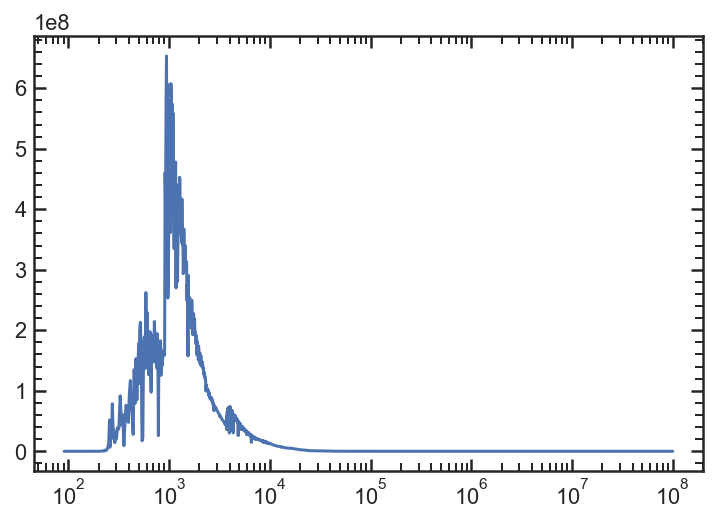

In [12]:
plt.plot(wave, flux)
plt.xscale('log')

In [15]:
flam1 = F_lam_per_M(flux, wave*(2), 1, 0, sp.stellar_mass)

In [16]:
mdl = F_lam_per_M_test(wave * 2, flux, 1, 0, m_star=sp.stellar_mass)

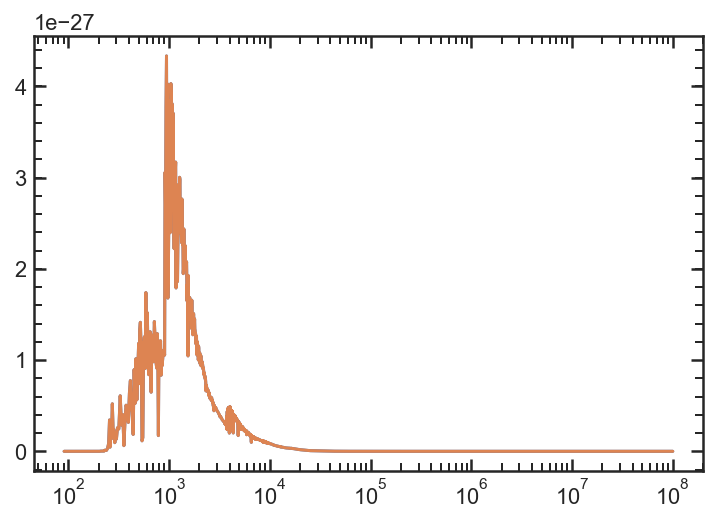

In [17]:
plt.plot(wave, flam1)
plt.plot(mdl.rst_wave, mdl.flam)

plt.xscale('log')

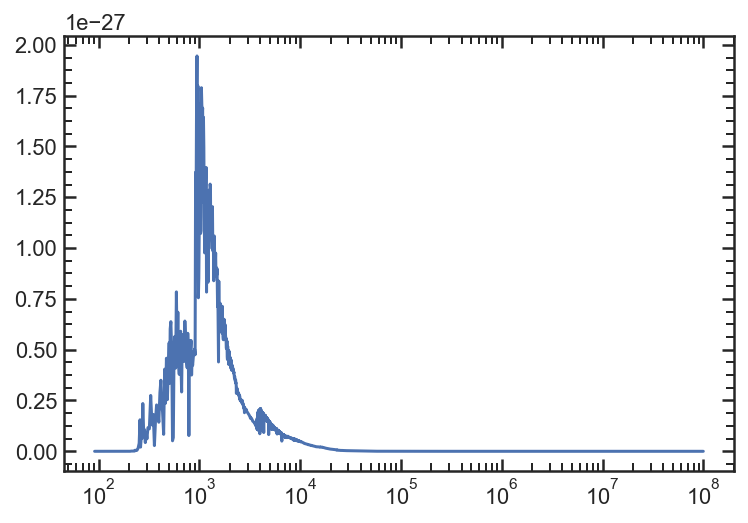

In [57]:
plt.plot(mdl.rst_wave, mdl.flam)
plt.xscale('log')

In [62]:
sp.stellar_mass

0.522397452901876

In [60]:
full_db = pd.read_pickle('../dataframes/fitdb/evolution_db.pkl')
tbl1 = full_db.query('field == "GSD" and id == 39170')

tbl2 = np.load('../data/posteriors/GSD_39170_KI.npy', allow_pickle = True).item()
tbl3 = np.load('../data/GSD_39170_KI.npy', allow_pickle = True).item()

In [25]:
from spec_exam import Gen_spec_2D
sp = fsps.StellarPopulation(zcontinuous = 1, logzsol = 0, sfh = 3, dust_type = 1)

###########gen spec##########
Gs = Gen_spec_2D('GSD', 39170, 1.023, g102_lims=[8200, 11300], g141_lims=[11200, 16000],
                 phot_errterm = 0.04, irac_err = 0.08, mask = True)

load_master_fits: /Volumes/Vince_CLEAR/RELEASE_v2.1.0/BEAMS/ERSPRIME/ERSPRIME_39170.beams.fits
1 icxt20f7q_flt.fits G102
2 icxt20f8q_flt.fits G102
3 icxt20fbq_flt.fits G102
4 icxt20fdq_flt.fits G102
5 icxt21b7q_flt.fits G102
6 icxt21b8q_flt.fits G102
7 icxt21bcq_flt.fits G102
8 icxt21beq_flt.fits G102
9 icxt19o6q_flt.fits G102
10 icxt19o7q_flt.fits G102
11 icxt19oaq_flt.fits G102
12 icxt19ocq_flt.fits G102
13 icxt22pmq_flt.fits G102
14 icxt22pnq_flt.fits G102
15 icxt22pqq_flt.fits G102
16 icxt22psq_flt.fits G102
17 icxt23pvq_flt.fits G102
18 icxt23pwq_flt.fits G102
19 icxt23pzq_flt.fits G102
20 icxt23q1q_flt.fits G102
21 ibhj23sxq_flt.fits G141
22 ibhj23t4q_flt.fits G141
23 ibhj23tbq_flt.fits G141
24 ibhj23tiq_flt.fits G141
True
advanced
True
advanced


In [46]:
specz = 1.023
from spec_tools import convert_sfh, get_agebins
from spec_id import Gather_grism_data_from_2d, Full_forward_model
def Q_spec_adjust(Gs, fit_db):
    sp.params['dust2'] = fit_db['bfd'].values[0]
    sp.params['dust1'] = fit_db['bfd'].values[0]
    sp.params['logzsol'] = np.log10(fit_db['bfm'].values[0])
    
    time, sfr, tmax = convert_sfh(get_agebins(fit_db['bfa'].values[0]), 
        [fit_db['bfm1'].values[0], fit_db['bfm2'].values[0], fit_db['bfm3'].values[0], 
         fit_db['bfm4'].values[0], fit_db['bfm5'].values[0], 
         fit_db['bfm6'].values[0],fit_db['bfm7'].values[0], fit_db['bfm8'].values[0], 
         fit_db['bfm9'].values[0], fit_db['bfm10'].values[0]], maxage = fit_db['bfa'].values[0]*1E9)

    sp.set_tabular_sfh(time,sfr) 

    wave, flux = sp.get_spectrum(tage = fit_db['bfa'].values[0], peraa = True)
    flam = F_lam_per_M(flux,wave*(1 + specz), specz, 0, sp.stellar_mass)*10**fit_db['bflm'].values[0]
    
    return wave, flam

def Q_spec_adjust_KI(Gs, fit_db):
    sp.params['dust2'] = fit_db['bfd']
    sp.params['dust1'] = fit_db['bfd']
    sp.params['logzsol'] = np.log10(fit_db['bfm'])
    
    sfh_tuple = np.hstack([0, fit_db['bflogssfr'], 3, 
                           fit_db['bft25'],fit_db['bft50'],fit_db['bft75']])
    sfh, timeax = tuple_to_sfh_stand_alone(sfh_tuple, specz)
    
    sp.set_tabular_sfh(timeax,sfh) 
    
    wave, flux = sp.get_spectrum(tage = timeax[-1], peraa = True)
    lmass = fit_db['lmass'][fit_db['Plmass'] == max(fit_db['Plmass'])][0]
    flam = F_lam_per_M(flux,wave*(1 + specz), specz, 0, sp.stellar_mass)*10**lmass
    
    return wave, flam

In [61]:
wave,flam1 = Q_spec_adjust(Gs, tbl1)
wave,flam2 = Q_spec_adjust_KI(Gs, tbl2)
wave,flam3 = Q_spec_adjust_KI(Gs, tbl3)

In [62]:
wvs, flxs, errs, beams, trans = Gather_grism_data_from_2d(Gs, sp)
    
Gmfl1, Pmfl1 = Full_forward_model(Gs, wave,flam1, specz, wvs, flxs, errs, beams, trans)
Gmfl2, Pmfl2 = Full_forward_model(Gs, wave,flam2, specz, wvs, flxs, errs, beams, trans)
Gmfl3, Pmfl3 = Full_forward_model(Gs, wave,flam3, specz, wvs, flxs, errs, beams, trans)


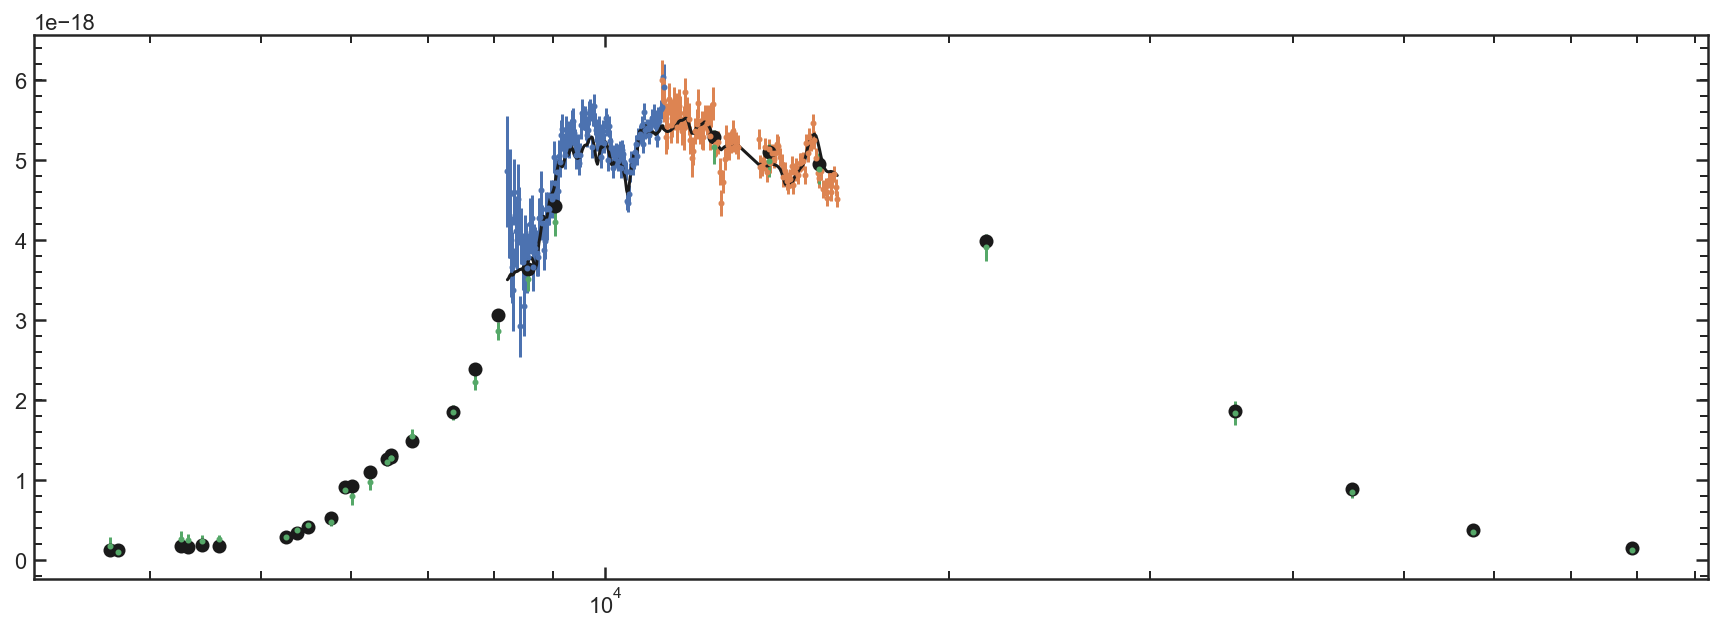

In [58]:
plt.figure(figsize = [15,5])
plt.errorbar(wvs[0], flxs[0], errs[0], fmt = 'o', ms =2)
plt.errorbar(wvs[1], flxs[1], errs[1], fmt = 'o', ms =2)
plt.errorbar(Gs.Pwv, Gs.Pflx, Gs.Perr, fmt = 'o', ms =2)
plt.plot(wvs[0], Gmfl1[0], 'k')
plt.plot(wvs[1], Gmfl1[1], 'k')
plt.plot(Gs.Pwv, Pmfl1, 'ko')

plt.xscale('log')

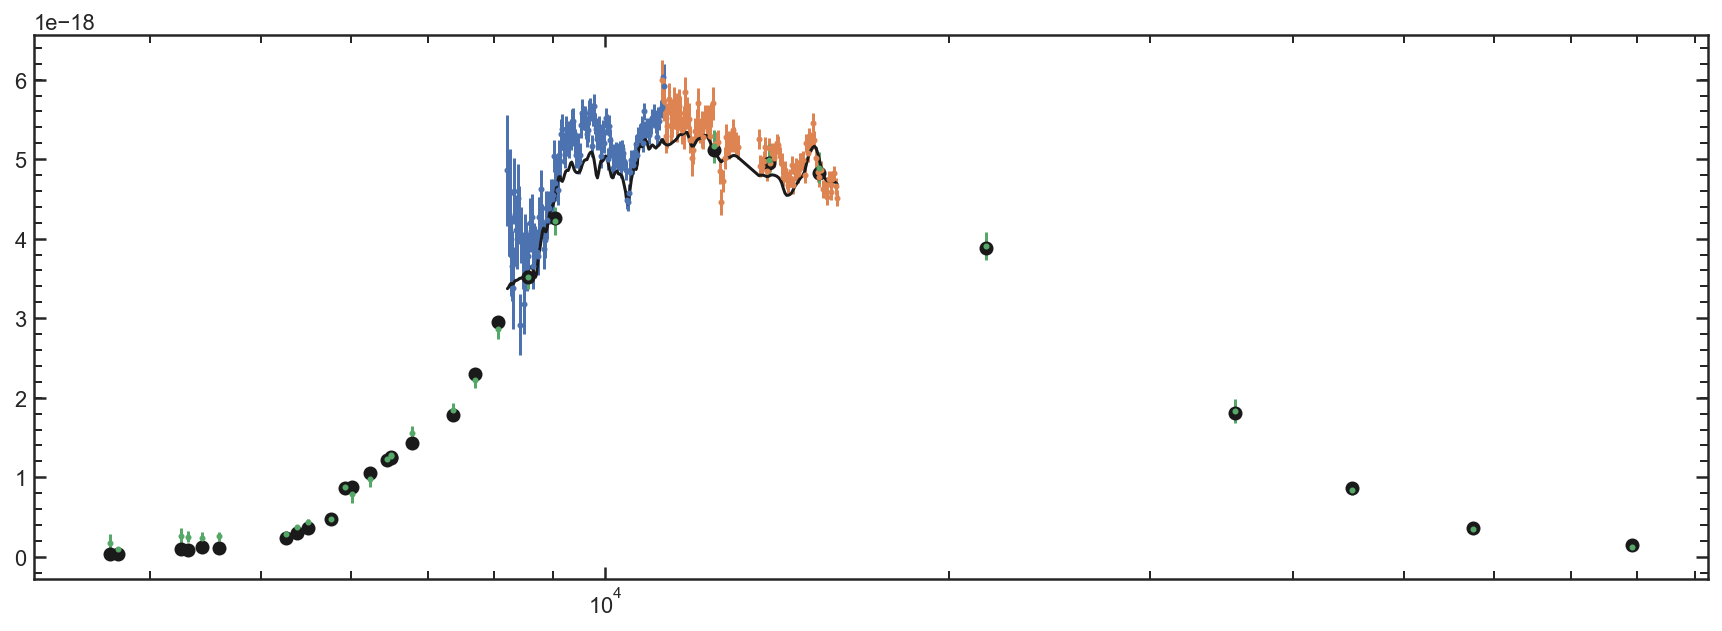

In [59]:
plt.figure(figsize = [15,5])
plt.errorbar(wvs[0], flxs[0], errs[0], fmt = 'o', ms =2)
plt.errorbar(wvs[1], flxs[1], errs[1], fmt = 'o', ms =2)
plt.errorbar(Gs.Pwv, Gs.Pflx, Gs.Perr, fmt = 'o', ms =2)
plt.plot(wvs[0], Gmfl2[0], 'k')
plt.plot(wvs[1], Gmfl2[1], 'k')
plt.plot(Gs.Pwv, Pmfl2, 'ko')

plt.xscale('log')

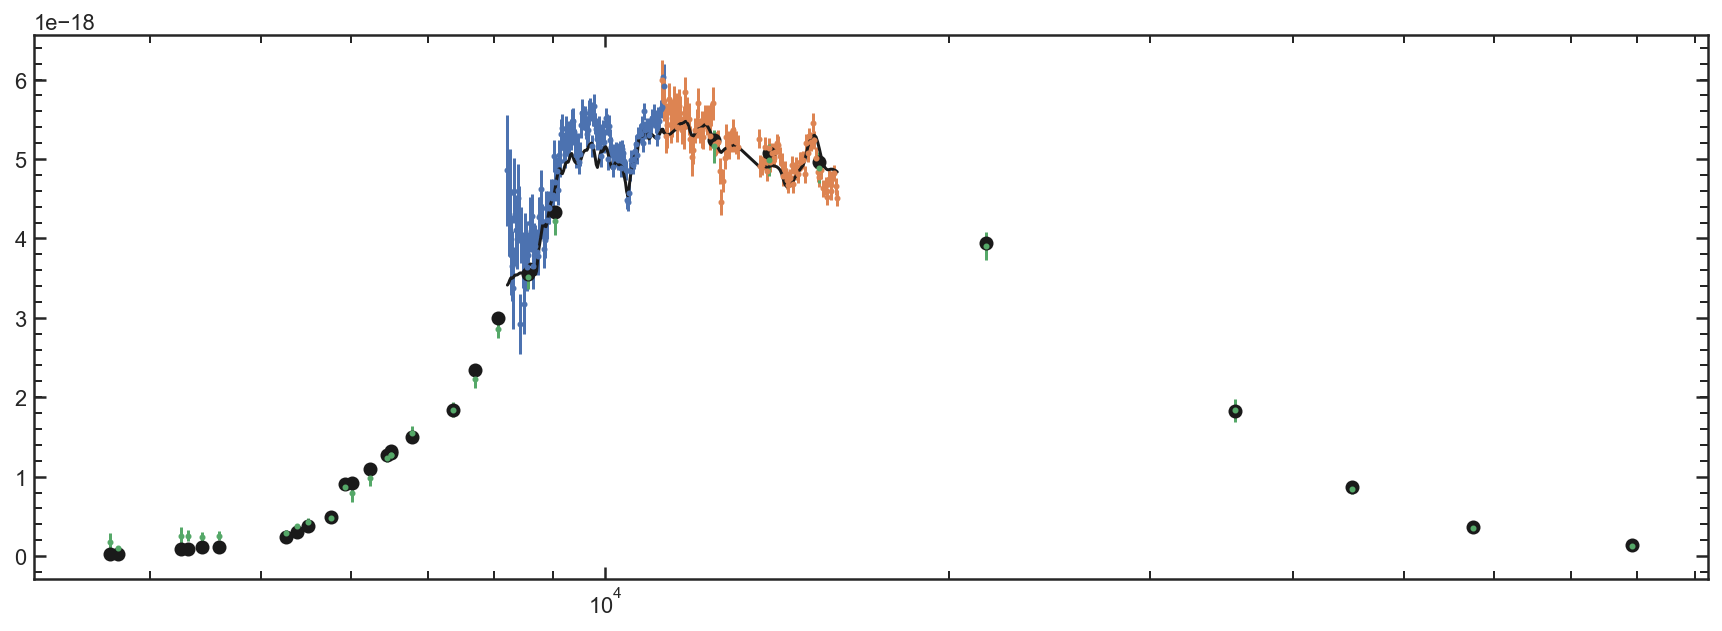

In [63]:
plt.figure(figsize = [15,5])
plt.errorbar(wvs[0], flxs[0], errs[0], fmt = 'o', ms =2)
plt.errorbar(wvs[1], flxs[1], errs[1], fmt = 'o', ms =2)
plt.errorbar(Gs.Pwv, Gs.Pflx, Gs.Perr, fmt = 'o', ms =2)
plt.plot(wvs[0], Gmfl3[0], 'k')
plt.plot(wvs[1], Gmfl3[1], 'k')
plt.plot(Gs.Pwv, Pmfl3, 'ko')

plt.xscale('log')

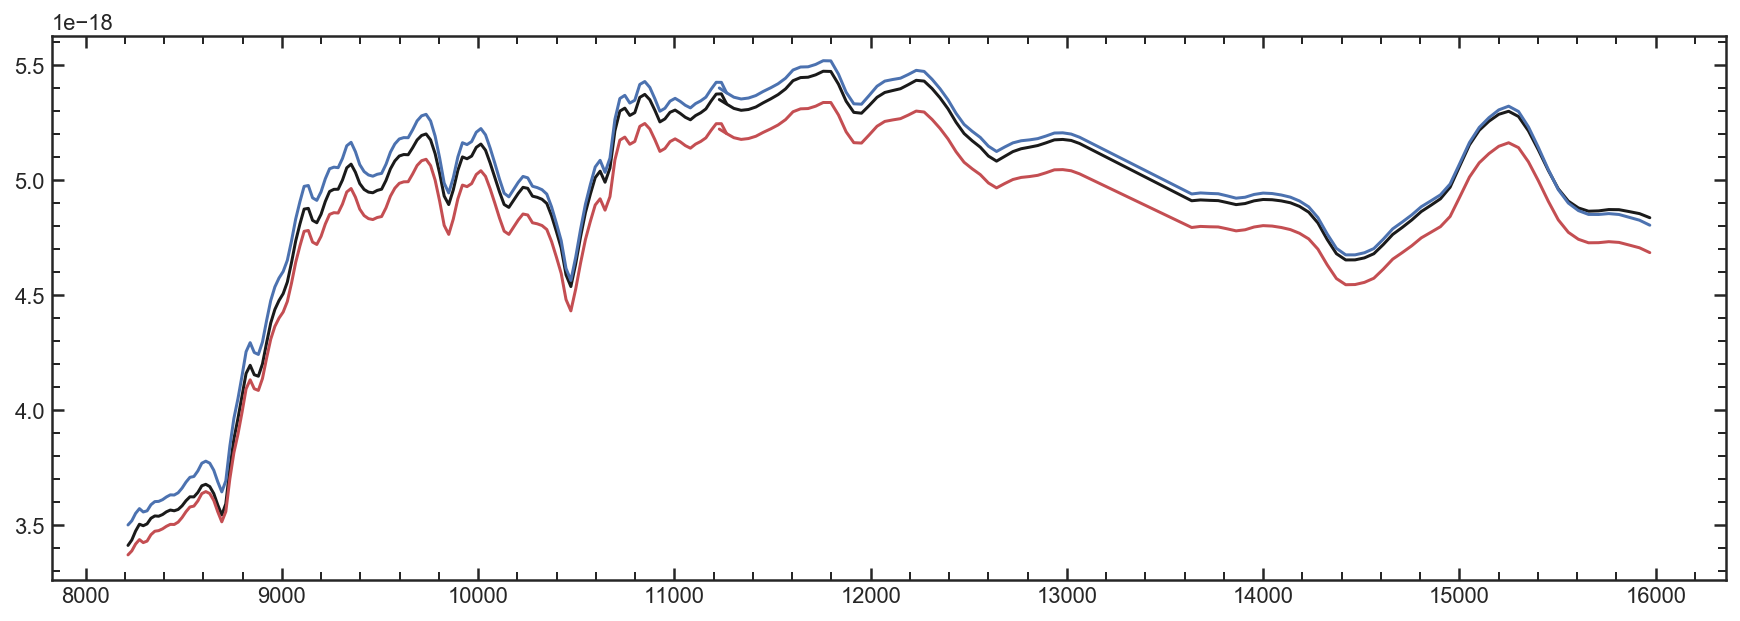

In [66]:
plt.figure(figsize = [15,5])
plt.plot(wvs[0], Gmfl3[0], 'k')
plt.plot(wvs[1], Gmfl3[1], 'k')
plt.plot(wvs[0], Gmfl2[0], 'r')
plt.plot(wvs[1], Gmfl2[1], 'r')
plt.plot(wvs[0], Gmfl1[0], 'b')
plt.plot(wvs[1], Gmfl1[1], 'b')

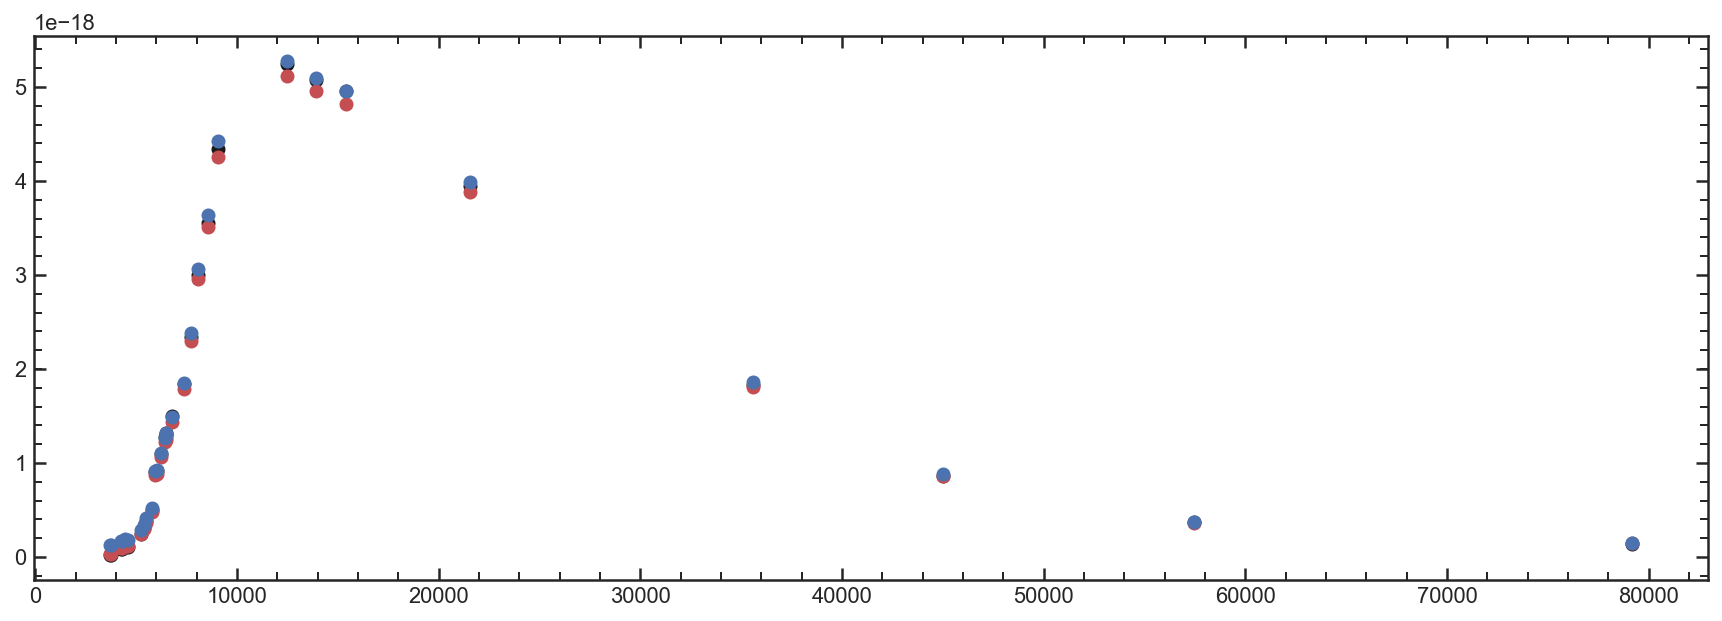

In [67]:
plt.figure(figsize = [15,5])
plt.plot(Gs.Pwv, Pmfl3, 'ko')
plt.plot(Gs.Pwv, Pmfl2, 'ro')
plt.plot(Gs.Pwv, Pmfl1, 'bo')
